<h1 style="color:black" align="center">Глава 2. Как описать данные</h1>
<h1 style="color:#008B8B">Задачи</h1>

<h3 style="color:#2E8B57">Задача № 1</h3>

Найдите среднее, стандартное отклонение, медиану, 25-й и 75-й процентили для следующей выборки:

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 7, 9, 10, 11]

Можно ли считать, что выборка извлечена из совокупности с нормальным распределением? Обоснуйте свой ответ. (Приведенные числа — клинические оценки тяжести серповидноклеточной анемии).

<h4 align='center'>Решение:</h4>

* Среднее — 3,09; 
* стандартное отклонение — 2,89; 
* медиана — 2;  
* 25-й процентиль — 1; 
* 75-й процентиль — 5 

Вряд ли данные извлечены из совокупности с нормальным распределением: среднее довольно сильно отличается от медианы, медиана гораздо ближе к 25-му процентилю (отклонение на 1 еденицу), чем к 75-му (отклонение на 3 еденицы), а значит, распределение асимметрично.

Поскольку среднее почти равно стандартному отклонению, в случае нормального распределения примерно 14% значений было бы меньше нуля:

$\large Z_0 = \frac{0 - 3.09}{2.89} = -1,07$

Теперь, найдём по таблице Z-значений, какой процент наблюдений лежит за пределами -1.07 стандартного отклонения. Получаем, что 14.23% наблюдений будут иметь отрицательные значения. Но в нашей выборке не имеется отрицательных значений, но они должны быть. Поэтому отсутствие отрицательных значений также говорит против нормальности распределения.

In [14]:
p25 = 211
p50 = 235.5
p75 = 246

In [15]:
p50 - p25

24.5

In [16]:
p50 - p75

-10.5

<h1 style="color:black" align="center">Глава 3. Сравнение нескольких групп:
дисперсионный анализ</h1>

<h1 style="color:#008B8B">Дисперсионный анализ</h1>

Мы уже выяснили, что чем больше разброс средних и чем меньше разброс значений внутри групп, тем меньше вероятность того, что наши группы — это случайные выборки из одной совокупности. Осталось только оформить это суждение количественно.

Дисперсию совокупности можно оценить двумя способами. Во-первых, дисперсия, вычисленная для каждой группы, — это оценка дисперсии совокупности. Поэтому дисперсию совокупности можно оценить на основании групповых дисперсий. Такая оценка не будет зависеть от различий групповых средних. Во-вторых, разброс выборочных средних тоже позволяет оценить дисперсию совокупности. Понятно, что такая оценка дисперсии зависит от различий выборочных средних


**Внутригрупповая дисперсия**

Перейдем к вычислениям. Как оценить дисперсию совокупности по четырем выборочным дисперсиям? Если верна гипотеза о том, что диета не влияет на величину сердечного выброса, то любая из них дает одинаково хорошую оценку. Поэтому в
качестве оценки дисперсии совокупности возьмем среднее выборочных дисперсий. Эта оценка называется внутригрупповой
дисперсией:

$sd_{wg}^2 = \large \frac{1}{m} \sum\limits_{i=1}^m sd_i^2$

Дисперсия внутри каждой группы вычисляется относительно среднего для группы. Поэтому внутригрупповая дисперсия не зависит от того, насколько различаются эти средние.



**Междугрупповая дисперсия**

Оценимтеперь дисперсию совокупности по выборочнымсредним. Так как мы предположили, что все четыре выборки извлечены из одной совокупности, стандартное отклонение четырех выборочных средних служит оценкой ошибки среднего. Вспомним, что стандартная ошибка среднего $SE$ связана со стандартным отклонением совокупности $\sigma$ и объемом выборки $n$ следующим соотношением:

$\large SE = \frac{\sigma}{\sqrt{n}}$

Как найти $SE$ по выборочным средним?

$\large SE = \sqrt{\frac{\sum\limits_{i=1}^m (\bar{X_i} - \bar{X})^2}{m-1}}$

Почему мы делим на $m-1$? Ответ: Так как мы используем выборочное среднее, то дожны вычесть еденицу от количества групп. Почему всё под конем? Ответ: стандартная ошибка среднего вычисляется аналогично стандартному отклонению, значит, под конем стоит дисперсия выборочных средних.

Тем самым, дисперсию совокупности $\sigma^2$ можно рассчитать
следующим образом:

$\large \sigma^2 = n \cdot SE^2$

Воспользуемся этим, чтобы оценить дисперсию совокупности по разбросу значений выборочных средних. Эта оценка называется межгрупповой дисперсией:

$\large sd_{bg}^2 = n \cdot SE^2$

Почему мы не используем оценку $SE^2$? Овет: Так как это квадрат отклонений выборочнх средних, а нам необходимо найти дисперсию совокупности основываясь на выборочных средних, поэтому мы используем в качестве ответа $\sigma^2$ или же $sd_{bg}^2$. Зная значение $SE$, мы можем легко вычислить стандартное отклонение совокупности.

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 8, 6

In [2]:
mu, sigma = 4, 2
normal = np.random.normal(mu, sigma, 10000)

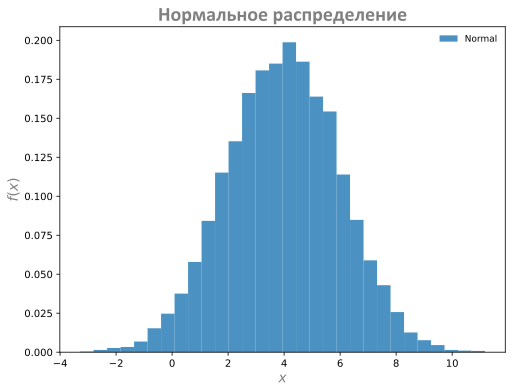

In [3]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': '14', 'color': '#808080', 'family': 'Calibri'}

plt.hist(normal, bins=30, density=True, alpha=0.8, label='Normal')

plt.title('Нормальное распределение', fontdict=title_dict)
plt.xlabel('$x$', fontdict=lable_dict)
plt.ylabel('$f(x)$', fontdict=lable_dict)

plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

In [4]:
def create_f(data, count_choice=4, size_choice=100, count_f=200):
    samples_f = np.array([])
    for _ in range(count_f):
        selections = np.random.choice(data, (count_choice, size_choice))

        sd_wg2 = 0
        for i in selections:
            sd_wg2 += i.var(ddof=1)
        sd_wg2 /= count_choice

        X = selections.mean()
        SE = 0
        for i in selections:
            SE += (i.mean() - X) ** 2
        SE = math.sqrt(SE / (count_choice-1))

        sd_bg2 = size_choice * SE ** 2
        samples_f = np.append(samples_f, round(sd_bg2 / sd_wg2, 1))
    return samples_f

In [5]:
choice_f = create_f(normal, count_f=100000)

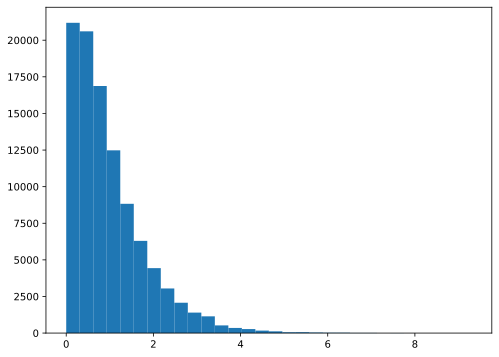

In [6]:
plt.hist(choice_f, bins=30)
plt.show()